In [90]:
import pandas as pd
import networkx as nx
from textblob import TextBlob
from networkx.algorithms import community
import spacy
nlp = spacy.load('en_core_web_sm')

We would like to understand the relationships between different topics and concepts in the text below. We will combine text analytics and network analytics.

- Using sentence segmentation, break the text to sentences.
- Using named entity extraction, identify named entities in each sentence.
- Create a newtork in which the nodes are named entities and the links are whether the two named entities co-occured in same sentences. Add the frequency of co-occurences as an edge property.
- What is the most frequent relation in the data?
- What are the top five influential nodes?
- Plot the network, any insights?

In [91]:
text = open('data/const.txt', 'r').read()
print(text[:500])

We the People of the United States, in Order to form a more perfect Union,
establish Justice, insure domestic Tranquility, provide for the common
defence, promote the general Welfare, and secure the Blessings of Liberty to
ourselves and our Posterity, do ordain and establish this Constitution for the
United States of America.

Article 1.

Section 1
All legislative Powers herein granted shall be vested in a Congress of the
United States, which shall consist of a Senate and House of Representative


In [92]:
blob = TextBlob(text)
sentences = blob.sentences
sentences[:3]

[Sentence("We the People of the United States, in Order to form a more perfect Union,
 establish Justice, insure domestic Tranquility, provide for the common
 defence, promote the general Welfare, and secure the Blessings of Liberty to
 ourselves and our Posterity, do ordain and establish this Constitution for the
 United States of America."),
 Sentence("Article 1."),
 Sentence("Section 1
 All legislative Powers herein granted shall be vested in a Congress of the
 United States, which shall consist of a Senate and House of Representatives.")]

In [93]:
def get_ne(text):
    doc = nlp(text)
    return [e.text for e in doc.ents]

In [95]:
named_entities = [get_ne(sent.raw) for sent in sentences]

In [100]:
edges1 = [(word1, word2) for le in named_entities
    for word1 in le for word2 in le
    if word1 != word2
]

In [101]:
from collections import Counter

In [103]:
edges = Counter(edges1)

In [104]:
net = nx.Graph()

In [107]:
for edge in edges:
    node1 = edge[0]
    node2 = edge[1]
    freq = edges[edge]
    net.add_edge(node1, node2, freq=freq)

In [110]:
#net.edges(data=True)

In [114]:
nedges = net.edges(data=True)

In [118]:
data = pd.DataFrame(nedges)
data.columns = ['n1', 'n2', 'f']
data.head()

,n1,n2,f
0,the United States,Welfare,{'freq': 1}
1,the United States,the Blessings of Liberty,{'freq': 1}
2,the United States,United States of America,{'freq': 1}
3,the United States,seven Years,{'freq': 1}
4,the United States,State,{'freq': 31}


In [121]:
data['freq'] = data['f'].apply(lambda x: x['freq'])
data = data.drop('f', axis=1)


In [122]:
data.sort_values('freq', ascending=False).head(25)

,n1,n2,freq
4,the United States,State,31
22,the United States,Congress,29
119,Congress,State,28
149,Congress,States,24
42,the United States,Militia,18
45,the United States,States,16
1823,States,Constitution,16
156,Congress,Constitution,13
52,the United States,Constitution,12
294,Senate,the House of Representatives,12


In [124]:
pd.Series(nx.degree_centrality(net)).sort_values(ascending=False).head(25)

Congress                       0.511041
the United States              0.343849
State                          0.287066
States                         0.208202
1                              0.208202
Constitution                   0.201893
Georgia                        0.198738
Connecticut                    0.198738
New Jersey                     0.198738
Pennsylvania                   0.198738
Massachusetts                  0.198738
Maryland                       0.198738
Virginia                       0.198738
North Carolina                 0.198738
New York                       0.198738
South Carolina                 0.198738
William Blount                 0.167192
Richard Dobbs Spaight          0.167192
James Madison Jr.              0.167192
Hugh Williamson                0.167192
William Jackson                0.167192
John Blair                     0.167192
Daniel Carroll                 0.167192
Daniel of St Thomas Jenifer    0.167192
James McHenry                  0.167192


In [125]:
pd.Series(nx.closeness_centrality(net)).sort_values(ascending=False).head(25)

Congress             0.654752
the United States    0.566566
State                0.543502
States               0.516099
Constitution         0.512653
Senate               0.507568
one                  0.500128
three                0.489759
Authority            0.482828
two thirds           0.479811
Electors             0.479062
Duties               0.476091
Manner               0.476091
Reprisal             0.475354
Marque               0.475354
Letters              0.475354
the supreme Court    0.475354
House                0.475354
Law                  0.473157
Militia              0.470259
District             0.468823
Ambassadors          0.464567
Treason              0.463166
Consuls              0.461773
Navy                 0.458327
dtype: float64

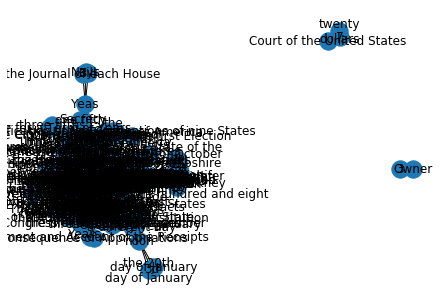

In [126]:
nx.draw(net, with_labels=True)

In [127]:
net2 = nx.Graph()
for edge in edges:
    node1 = edge[0]
    node2 = edge[1]
    freq = edges[edge]
    if freq > 6:
        net2.add_edge(node1, node2, freq=freq)

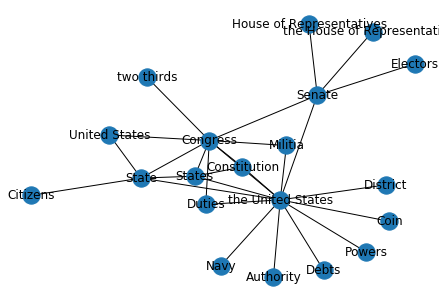

In [128]:
nx.draw(net2, with_labels=True)

In [129]:
communities = community.greedy_modularity_communities(net, weight='freq')

In [130]:
len(communities)

15

In [131]:
communities

[frozenset({'1',
            '13',
            '14',
            '15',
            '18',
            '2',
            '20',
            '21',
            '22',
            '23',
            '24',
            '25',
            '26',
            'Abraham Baldwin',
            'Alexander Hamilton',
            'Arms',
            'Benjamin Franklin',
            'Charles Cotesworth Pinckney',
            'Charles Pinckney',
            'Daniel Carroll',
            'Daniel of St Thomas Jenifer',
            'David Brearley',
            'Dayton',
            'Delaware - George Read',
            'George Clymer',
            'George Washington',
            'Gouvernour Morris',
            'Gunning Bedford Jr.',
            'Hugh Williamson',
            'Jacob Broom',
            'James Madison Jr.',
            'James McHenry',
            'James Wilson',
            'Jared Ingersoll',
            'John Blair',
            'John Dickinson',
            'John Langdon',
            'John R